Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read the data from the csv file using **pandas** and visualize it using **matplotlib**

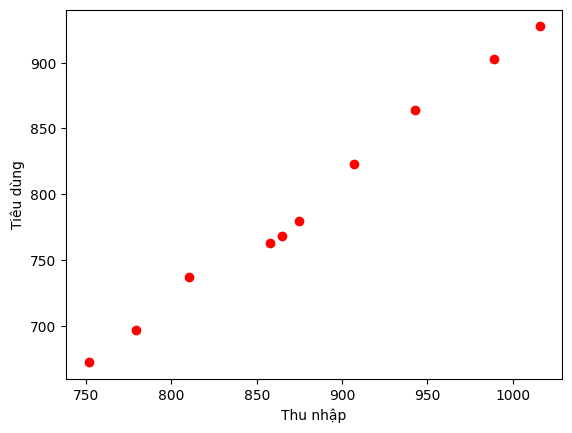

In [2]:
df = pd.read_csv('data-america.csv')
# visualize the data
x = df['x (thu nhap)']
y = df['y (tieu dung)']
plt.scatter(x, y, color='r')
plt.xlabel("Thu nhập")
plt.ylabel("Tiêu dùng")

plt.show()

Function `predict(x, w, x)` to predict the output for a given input x, weight w and bias x

Funtion `MSE(w0, w1, x, y)` to calculate the mean squared error for a given weight w0, w1, bias x and output y

Function `SSE(w0, w1, x, y)` to calculate the sum of squared error for a given weight w0, w1, bias x and output y

In [3]:
def predict(w0, w1, x):
    return w0 + w1 * x
def MSE(w0, w1, x, y):
    return np.mean((y - predict(w0, w1, x)) ** 2)
def SSE(w0, w1, x, y):
    return np.sum((y - predict(w0, w1, x)) ** 2)

e is the learning rate

In [4]:
w0 = 0
w1 = 1
df['y predicted'] = predict(w0, w1, df['x (thu nhap)'])
df['e'] =  df['y predicted'] - df['y (tieu dung)']
df['e^2'] = df['e'] ** 2
df

,Year,x (thu nhap),y (tieu dung),y predicted,e,e^2
0,1970,751.6,672.1,751.6,79.5,6320.25
1,1971,779.2,696.8,779.2,82.4,6789.76
2,1972,810.3,737.1,810.3,73.2,5358.24
3,1973,864.7,767.9,864.7,96.8,9370.24
4,1974,857.5,762.8,857.5,94.7,8968.09
5,1975,874.9,779.4,874.9,95.5,9120.25
6,1976,906.8,823.1,906.8,83.7,7005.69
7,1977,942.9,864.3,942.9,78.6,6177.96
8,1978,988.8,903.2,988.8,85.6,7327.36
9,1979,1015.7,927.6,1015.7,88.1,7761.61


In [5]:
sse = SSE(w0, w1, df['x (thu nhap)'], df['y (tieu dung)'])
mse = MSE(w0, w1, df['x (thu nhap)'], df['y (tieu dung)'])
sse, mse

(74199.45000000001, 7419.9450000000015)

In [6]:
w0 = 0
w1 = 0.9
df['y predicted'] = predict(w0, w1, df['x (thu nhap)'])
df['e'] =  df['y predicted'] - df['y (tieu dung)']
df['e^2'] = df['e'] ** 2
df

,Year,x (thu nhap),y (tieu dung),y predicted,e,e^2
0,1970,751.6,672.1,676.44,4.34,18.8356
1,1971,779.2,696.8,701.28,4.48,20.0704
2,1972,810.3,737.1,729.27,-7.83,61.3089
3,1973,864.7,767.9,778.23,10.33,106.7089
4,1974,857.5,762.8,771.75,8.95,80.1025
5,1975,874.9,779.4,787.41,8.01,64.1601
6,1976,906.8,823.1,816.12,-6.98,48.7204
7,1977,942.9,864.3,848.61,-15.69,246.1761
8,1978,988.8,903.2,889.92,-13.28,176.3584
9,1979,1015.7,927.6,914.13,-13.47,181.4409


Find the regression coefficients a and b with the formula given


In [7]:
one = np.ones((10, ))
x = np.array([one, df['x (thu nhap)'].values]).T
y = np.array(df['y (tieu dung)'].values)

w = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
print(w)

[-67.58065089   0.97926692]


In [8]:
x0 = np.ones((4,))
x = np.array([x0, [1, 2, 3, 4]]).T
y = np.array([2, 3, 3, 5])

w = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
print(w)
print('y = {} + {}x'.format(w[0], round(w[1], 1)))

[1.  0.9]
y = 1.0 + 0.9x


In [9]:
x0 = np.ones((4,))
x1 = np.array([1, 2, 3, 4])
x2 = np.array([1, 3, 4, 3])
y = np.array([1, 3, 4, 5])
X = np.array([x0, x1, x2]).T

w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print(w)
print('y = {} + {}x1 + {}x2'.format(w[0], round(w[1], 1), round(w[2], 1)))

[-0.30434783  1.08695652  0.30434783]
y = -0.3043478260869614 + 1.1x1 + 0.3x2
